Colab Link: https://colab.research.google.com/drive/1u93tB_xbgIrgWNFWrHId_oom7ttz1T01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt

## Data Prep

### Read Data

In [132]:
# Parse date column as date when reading data
# dayfirst = True uses the dd/mm/yyyy format instead of the default mm/dd/yyyy
# we pass the index of the date column to the parse_dates parameter
df_ts_base1 = pd.read_csv('data/TimeSeriesData1.csv', dayfirst=True, parse_dates=[0])

In [133]:
df_ts1 = df_ts_base1.copy()
df_ts1.head(2)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44


#### Transform date column to date datatype (Optional)

In [126]:
# We can also convert the date column after reading the csv
# We would do this if for some reason we read the date column without parsing it as a date
df_ts_base2 = pd.read_csv('data/TimeSeriesData1.csv')
df_ts_base2.date = pd.to_datetime(df_ts_base2.date, dayfirst = True)
df_ts_base2.head(2)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44


In [134]:
df_ts1.describe()

,date,spx,dax,ftse,nikkei
count,6269,6269.000000,6269.000000,6269.000000,6269.000000
mean,2006-01-14 19:36:59.492742144,1288.127542,6080.063363,5422.713545,14597.055700
min,1994-01-07 00:00:00,438.920000,1911.700000,2876.600000,7054.980000
25%,2000-01-11 00:00:00,990.671905,4069.350000,4486.100000,10709.290000
50%,2006-01-12 00:00:00,1233.420000,5773.340000,5662.430000,15028.170000
75%,2012-01-19 00:00:00,1459.987747,7443.070000,6304.250000,17860.470000
max,2018-01-29 00:00:00,2872.867839,13559.600000,7778.637689,24124.150000
std,NaN,487.586473,2754.361032,1145.572428,4043.122953


### Resample Data
https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.DataFrame.resample.html#pandas.DataFrame.resample

#### Downsample

In [105]:
df_ts1_mth = df_ts1.resample('M', on='date').mean()
df_ts1_mth.head(2)

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,474.461765,2147.265294,3437.359412,18834.518235
1994-02-28,471.385500,2123.696500,3396.390500,19712.622000


#### Upsample

In [119]:
df_ts1_hr = df_ts1.resample('H', on='date').mean()
df_ts1_hr.head(75)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07 00:00:00,469.90,2224.95,3445.98,18124.01
1994-01-07 01:00:00,NaN,NaN,NaN,NaN
1994-01-07 02:00:00,NaN,NaN,NaN,NaN
1994-01-07 03:00:00,NaN,NaN,NaN,NaN
1994-01-07 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
1994-01-09 22:00:00,NaN,NaN,NaN,NaN
1994-01-09 23:00:00,NaN,NaN,NaN,NaN
1994-01-10 00:00:00,475.27,2225.00,3440.58,18443.44


#### Set Desired Frequency

In [135]:
# Set date column as index if it has not been set as the index based on some prior operation
df_ts1.set_index("date", inplace=True)

In [136]:
df_ts1.head(2)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44


In [138]:
# This will generate new rows for missing periods for the desired frequency
# Set the frequency only after setting the date column as index
# Parameter 'b' signifies business days
# Here we are using 'b' instead of 'd' for all days as our data is relevant only for business days
df_ts1 = df_ts1.asfreq("b")

In [139]:
df_ts1.head(2)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44


### Handle Missing Data

In [140]:
# Find number of missing elements
df_ts1.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [141]:
# Front fill NaNs
df_ts1 = df_ts1.ffill()

In [142]:
df_ts1.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
# Fill in missing values with linear interpolation (euqally spaced values)
# https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.DataFrame.interpolate.html
df_ts1_hr_interpolated = df_ts1_hr.interpolate(method='linear')
df_ts1_hr_interpolated.head(75)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07 00:00:00,469.900000,2224.950000,3445.980000,18124.010000
1994-01-07 01:00:00,469.974583,2224.950694,3445.905000,18128.446528
1994-01-07 02:00:00,470.049167,2224.951389,3445.830000,18132.883056
1994-01-07 03:00:00,470.123750,2224.952083,3445.755000,18137.319583
1994-01-07 04:00:00,470.198333,2224.952778,3445.680000,18141.756111
...,...,...,...,...
1994-01-09 22:00:00,475.120833,2224.998611,3440.730000,18434.566944
1994-01-09 23:00:00,475.195417,2224.999306,3440.655000,18439.003472
1994-01-10 00:00:00,475.270000,2225.000000,3440.580000,18443.440000


## Feature Engineering

### Add Basic Date Time Columns
https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

In [143]:
# Add additional date columns as needed
df_ts1['year'] = df_ts1.index.year
df_ts1['month'] = df_ts1.index.month
df_ts1['day'] = df_ts1.index.day
# Create a new column with just the date component
df_ts1['date'] = df_ts1.index.date
df_ts1.head(2)

,spx,dax,ftse,nikkei,year,month,day,date
date,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,1994,1,7,1994-01-07
1994-01-10,475.27,2225.00,3440.58,18443.44,1994,1,10,1994-01-10


### Lag Features
https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

In [144]:
df_ts1['last_day'] =  df_ts1.spx.shift(1)   # last data point's value
df_ts1['last_week'] =  df_ts1.spx.shift(7)  # values for current -7th data point
df_ts1.head(2)

,spx,dax,ftse,nikkei,year,month,day,date,last_day,last_week
date,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,1994,1,7,1994-01-07,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,1994,1,10,1994-01-10,469.9,NaN


### Window Features
https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

In [145]:
# Aggreates over specified rolling windows
df_ts1['2day_mean'] =  df_ts1.spx.rolling(window=2).mean()
df_ts1['2day_max'] =  df_ts1.spx.rolling(window=2).max()
df_ts1.head(2)

,spx,dax,ftse,nikkei,year,month,day,date,last_day,last_week,2day_mean,2day_max
date,,,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,1994,1,7,1994-01-07,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,1994,1,10,1994-01-10,469.9,NaN,472.585,475.27


### Expanding (Cumulative) Features
https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

In [146]:
# Cumulative max
df_ts1['cum_max'] =  df_ts1.spx.expanding().max()
df_ts1.head(2)

,spx,dax,ftse,nikkei,year,month,day,date,last_day,last_week,2day_mean,2day_max,cum_max
date,,,,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,1994,1,7,1994-01-07,NaN,NaN,NaN,NaN,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,1994,1,10,1994-01-10,469.9,NaN,472.585,475.27,475.27


### Add / Remove other columns

In [147]:
# Add column
df_ts1['market_value'] = df_ts1.spx

In [148]:
# Remove columns
del df_ts1['spx'],df_ts1['dax'], df_ts1['ftse'], df_ts1['nikkei']

In [149]:
df_ts1.head(2)

,year,month,day,date,last_day,last_week,2day_mean,2day_max,cum_max,market_value
date,,,,,,,,,,
1994-01-07,1994,1,7,1994-01-07,NaN,NaN,NaN,NaN,469.90,469.90
1994-01-10,1994,1,10,1994-01-10,469.9,NaN,472.585,475.27,475.27,475.27


## Explore

### Test for Stationarity

In [33]:
adfuller_stats = sts.adfuller(df_ts1.market_value)
adfuller_stats

(1.1194986381728407,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [97]:
print("Test Statistic: ", adfuller_stats[0])
print("At 1% significance level, we can say that Data comes from a stationary process: ", adfuller_stats[0] < adfuller_stats[4]['1%']) 
print("At 5% significance level, we can say that Data comes from a stationary process: ", adfuller_stats[0] < adfuller_stats[4]['5%']) 
print("At 10% significance level, we can say that Data comes from a stationary process: ", adfuller_stats[0] < adfuller_stats[4]['10%']) 
# P-Value gives the probability of not rejecting the null
print("P-Value: ", adfuller_stats[1])
print("Number of lags used in regression: ", adfuller_stats[2])
print("Number of observations used in analysis: ", adfuller_stats[3])
print("Critical Values for Test Statistic: ", adfuller_stats[4])
# Maximized Informaton Criteria provided there is some autocorrelation
# The lower the values, the easier to predict futute values
print("Maximized Informaton Criteria provided: ", adfuller_stats[5])

Test Statistic:  1.1194986381728407
At 1% significance level, we can say that Data comes from a stationary process:  False
At 5% significance level, we can say that Data comes from a stationary process:  False
At 10% significance level, we can say that Data comes from a stationary process:  False
P-Value:  0.9953796476080692
Number of lags used in regression:  10
Number of observations used in analysis:  6266
Critical Values for Test Statistic:  {'1%': -3.4313940441948807, '5%': -2.8620013751563964, '10%': -2.567015587023998}
Maximized Informaton Criteria provided:  50258.209867750025


### Test for Seasonality

In [166]:
df_ts_base3 = pd.read_csv('data/TimeSeriesData2.csv', parse_dates=[0])
df_ts_base3.set_index("Month", inplace=True)
df_ts_base3.head(2)

,MilesMM
Month,
1963-01-01,6827
1963-02-01,6178


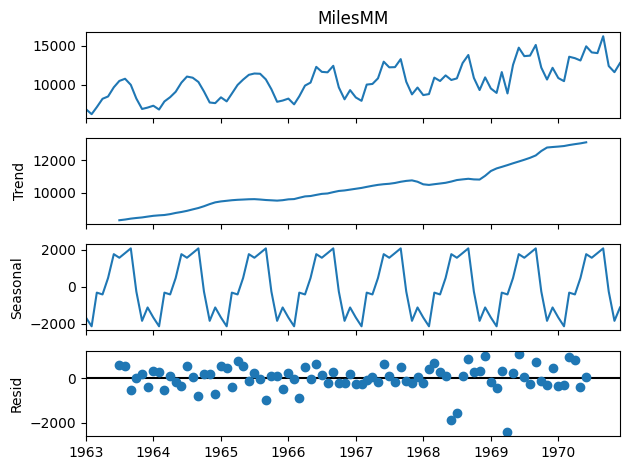

In [158]:
s_dec_additive = seasonal_decompose(df_ts_base3.MilesMM, model = "additive")
s_dec_additive.plot()
plt.show()

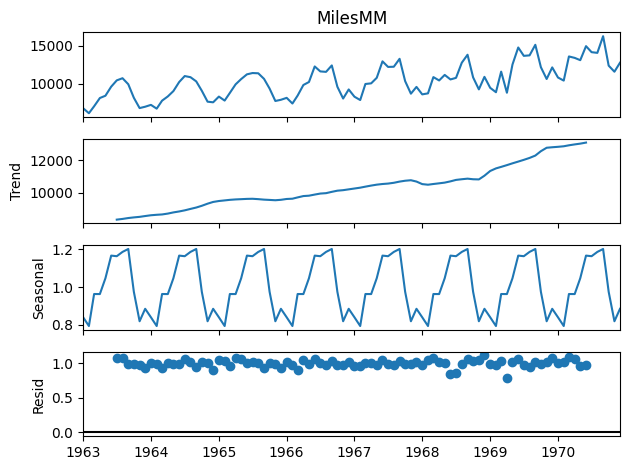

In [159]:
s_dec_multiplicative = seasonal_decompose(df_ts_base3.MilesMM, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Since the **Seasonal** effect does not show any trend in either the additive or the multiplicative test, the data is not seasonal

#### Differencing
https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.diff.html#pandas.Series.diff

##### Remove Trend

In [173]:
# Lag 1 Differencing to get rid of trends
# Uses the difference of current and 'Lag1' values (col - col.shift(1))
df_ts_base3['diff1'] = df_ts_base3['MilesMM'].diff(periods=1)
df_ts_base3.head(2)

,MilesMM,diff1
Month,,
1963-01-01,6827,NaN
1963-02-01,6178,-649.0


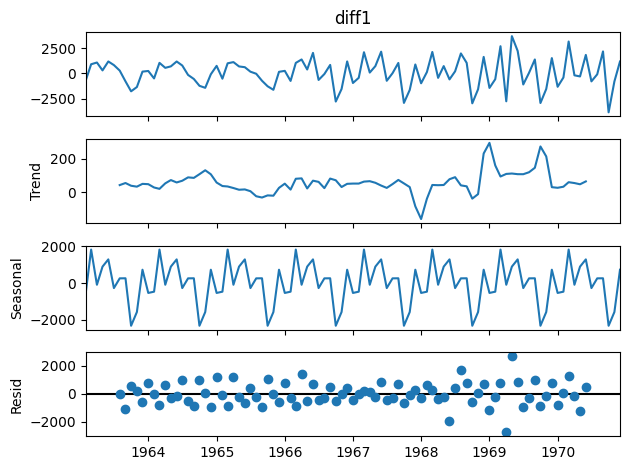

In [176]:
# plot decompose for column 3 and all rows excluding row 1 as missing values are not handled in the decompose function
s_dec_additive_diff1 = seasonal_decompose(df_ts_base3.iloc[1:,1], model = "additive")
s_dec_additive_diff1.plot()
plt.show()

##### Remove Seasonality

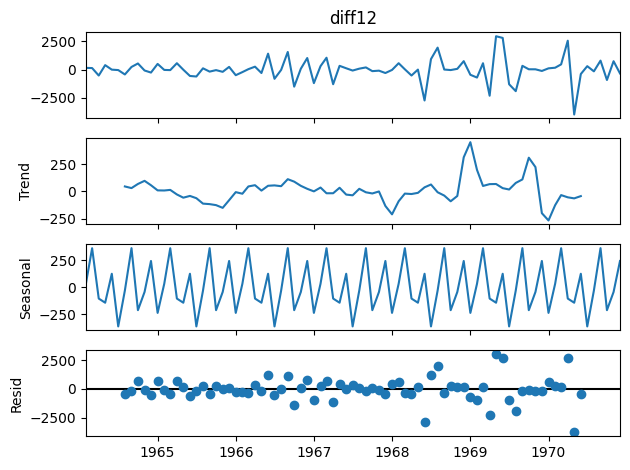

In [180]:
# Lag 12 Differencing to get rid of monthly seasonality
# Uses the difference of current and 'Lag12' values (col - col.shift(12))
df_ts_base3['diff12'] = df_ts_base3['diff1'].diff(periods=12)
s_dec_additive_diff12 = seasonal_decompose(df_ts_base3.iloc[13:,2], model = "additive").plot()
plt.show()

### Test for Autocorrelation (ACF)

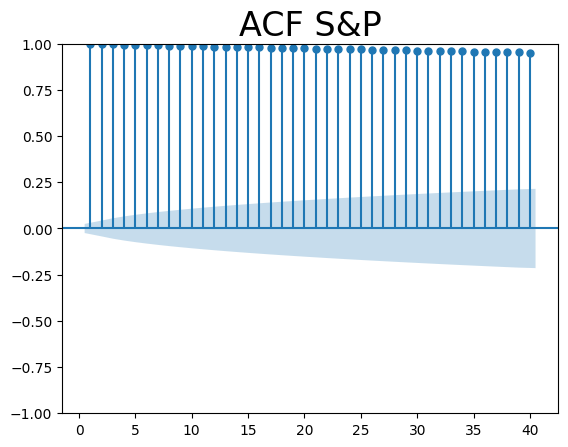

In [36]:
# zero = False means that the current period is not considered
# as the correlation between the current period and itself will always be 1
# 40 is the optimal number of lags for time series analysis
sgt.plot_acf(df_ts1.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### Test for Partial Autocorrelation (PACF)

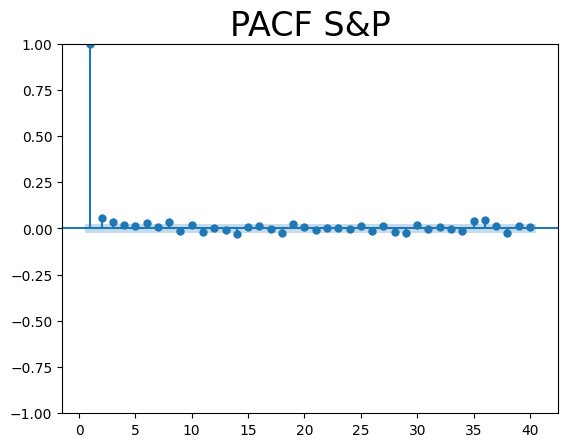

In [37]:
sgt.plot_pacf(df_ts1.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

## Train Test Split

In [38]:
# Get the lenght of the dataframe and 
# Split dataframe into 80:20 for train:test split

size = int(len(df_ts1) * 0.8)

df_train_ts1 = df_ts1.iloc[:size]
df_test_ts1 = df_ts1.iloc[size:]

In [39]:
df_train_ts1.tail(2)

,market_value
date,
2013-04-04,1559.979316
2013-04-05,1553.278930


In [40]:
df_test_ts1.head(2)

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909


In [42]:
len(df_train_ts1), len(df_test_ts1)

(5021, 1256)